# Reading score change

In [1]:
# load the dataset
import pandas as pd
df=pd.read_csv('INF2178_A3_data.csv')
df.head(4)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2


In [2]:
%pip install dfply
from dfply import *
# summary statistics for dependent variable yield
df['reading_score_change'] = df['springreadingscore'] - df['fallreadingscore']
df >> group_by(X.incomegroup) >> summarize(n=X['reading_score_change'].count(), mean=X['reading_score_change'].mean(), std=X['reading_score_change'].std())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 6.0 MB/s eta 0:00:00


,incomegroup,n,mean,std
0,1,4729,10.878279,7.462176
1,2,3726,11.716932,7.906122
2,3,3478,12.308387,8.967606


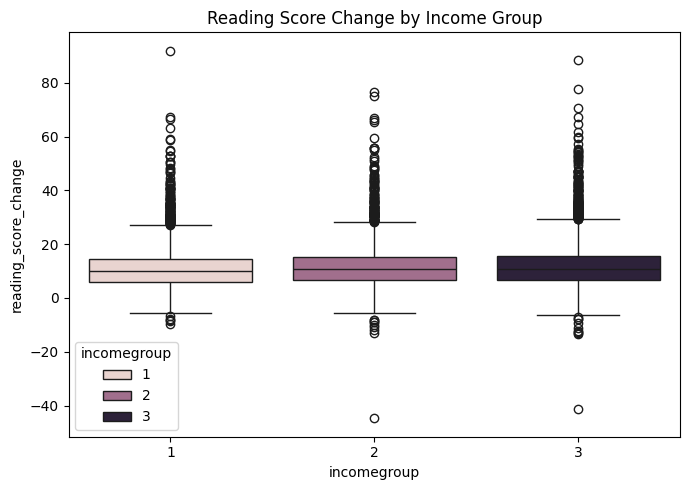

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
df['reading_score_change'] = df['springreadingscore'] - df['fallreadingscore']
plt.figure(figsize=(7, 5))
# boxplot for reading score change by income in thousands
sns.boxplot(data=df, x="incomegroup", y="reading_score_change", hue="incomegroup")
plt.title("Reading Score Change by Income Group")
plt.tight_layout()
plt.show()


In [4]:
%pip install pingouin
from pingouin import ancova
ancova(data=df, dv='reading_score_change', covar='incomeinthousands', between='incomegroup')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.5 MB/s eta 0:00:00


,Source,SS,DF,F,p-unc,np2
0,incomegroup,230.611199,2,1.775743,0.169402,0.000298
1,incomeinthousands,1130.725897,1,17.413537,0.000030,0.001458
2,Residual,774594.435180,11929,NaN,NaN,NaN


In [5]:
# ancova using statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Calculate the change in reading scores
df['reading_score_change'] = df['springreadingscore'] - df['fallreadingscore']
# Perform the ANCOVA
model = ols('reading_score_change ~ incomegroup + fallgeneralknowledgescore', data=df).fit()
# Print the summary of the model
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     reading_score_change   R-squared:                       0.023
Model:                              OLS   Adj. R-squared:                  0.023
Method:                   Least Squares   F-statistic:                     143.2
Date:                  Sat, 23 Mar 2024   Prob (F-statistic):           3.35e-62
Time:                          18:30:29   Log-Likelihood:                -41730.
No. Observations:                 11933   AIC:                         8.347e+04
Df Residuals:                     11930   BIC:                         8.349e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

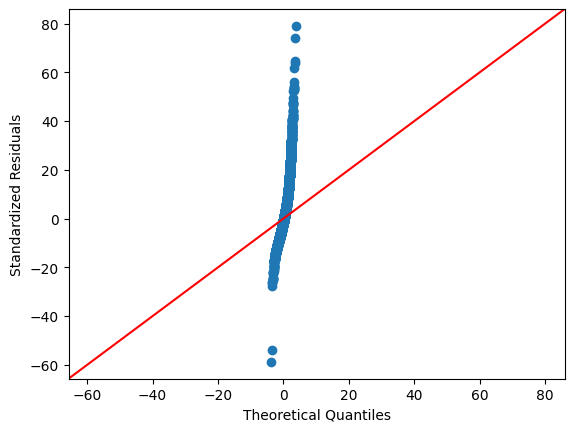

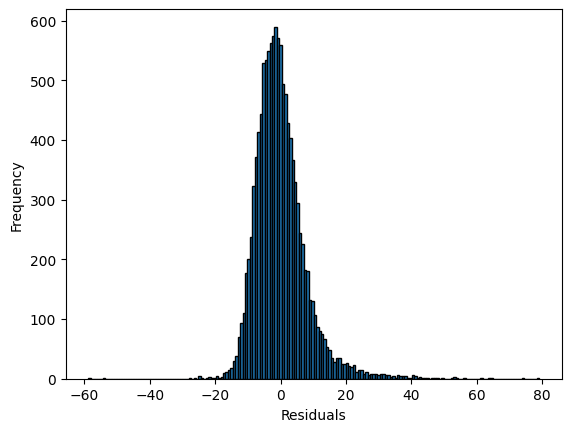

In [6]:
# Checking model diagnostics for assumptions
# Assumption 1: Normality of residuals
sm.qqplot(model.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram of residuals
plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()


In [7]:
from scipy import stats
# Assumption 1: Shapiro-Wilk test for normality of residuals
w, pvalue = stats.shapiro(model.resid)
print("Shapiro-Wilk test for normality of residuals:", w, pvalue)

Shapiro-Wilk test for normality of residuals: 0.8996428847312927 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [8]:
# Bartlett's test for homogeneity of variances (normally distributed samples)
grouped_data = [df[df['incomegroup'] == group]['reading_score_change'] for group in df['incomegroup'].unique()]

w, pvalue = stats.bartlett(*grouped_data)
print("Bartlett's test for homogeneity of variances:", w, pvalue)


Bartlett's test for homogeneity of variances: 141.220379357948 2.159654389086652e-31


In [9]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
w, pvalue = stats.levene(*[df['reading_score_change'][df['incomegroup'] == group] for group in df['incomegroup'].unique()])
print("Levene's test for homogeneity of variances:", w, pvalue)

Levene's test for homogeneity of variances: 19.7280103692154 2.794929503613517e-09


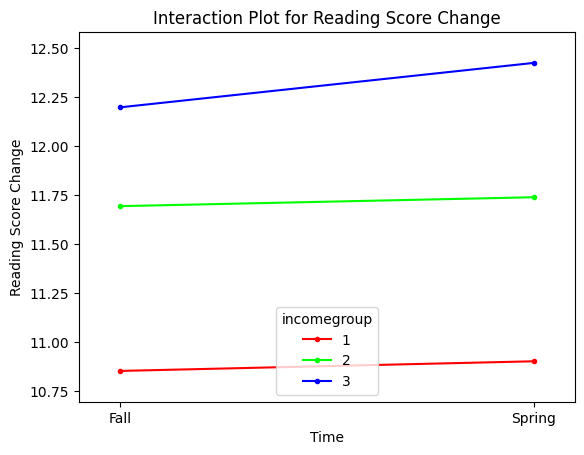

In [12]:
from statsmodels.graphics.factorplots import interaction_plot
df['time'] = np.random.choice(['Fall', 'Spring'], size=df.shape[0])

fig = interaction_plot(x=df['time'], trace=df['incomegroup'], response=df['reading_score_change'])
plt.title('Interaction Plot for Reading Score Change')
plt.xlabel('Time')
plt.ylabel('Reading Score Change')
plt.show()

# Math score change

In [13]:
%pip install dfply
from dfply import *
# summary statistics for dependent variable yield
df['math_score_change'] = df['springmathscore'] - df['fallmathscore']
df >> group_by(X.incomegroup) >> summarize(n=X['reading_score_change'].count(), mean=X['reading_score_change'].mean(), std=X['reading_score_change'].std())

,incomegroup,n,mean,std
0,1,4729,10.878279,7.462176
1,2,3726,11.716932,7.906122
2,3,3478,12.308387,8.967606


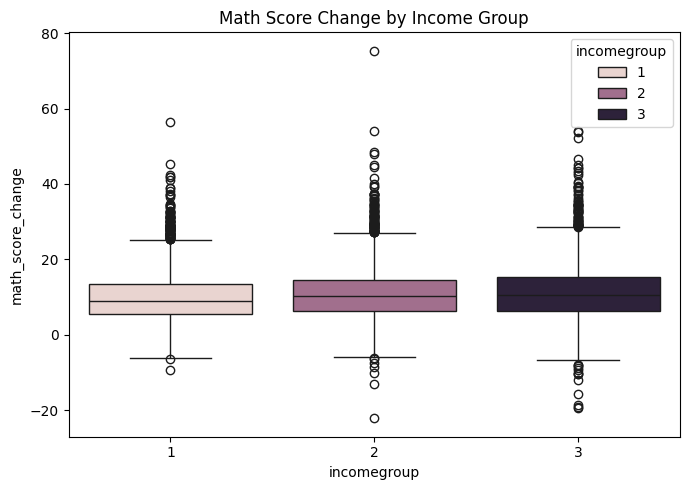

In [14]:
# Boxplot for math score change by income group
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="incomegroup", y="math_score_change", hue="incomegroup")
plt.title("Math Score Change by Income Group")
plt.tight_layout()
plt.show()


In [15]:
%pip install pingouin
from pingouin import ancova
ancova(data=df, dv='math_score_change', covar='incomeinthousands', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,538.101116,2,5.792105,3.060142e-03,0.000970
1,incomeinthousands,2189.346011,1,47.132112,6.964940e-12,0.003936
2,Residual,554117.086726,11929,NaN,NaN,NaN


In [16]:
# ancova using statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

df['math_score_change'] = df['springmathscore'] - df['fallmathscore']
# Perform the ANCOVA
model = ols('math_score_change ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      math_score_change   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sat, 23 Mar 2024   Prob (F-statistic):          1.36e-126
Time:                        18:33:53   Log-Likelihood:                -39610.
No. Observations:               11933   AIC:                         7.923e+04
Df Residuals:                   11929   BIC:                         7.926e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [17]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print("Shapiro-Wilk test:", w, pvalue)

Shapiro-Wilk test: 0.9664044380187988 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [18]:
# Bartlett's test for homogeneity of variances (normally distributed samples)
grouped_data = [df[df['incomegroup'] == group]['math_score_change'] for group in df['incomegroup'].unique()]

w, pvalue = stats.bartlett(*grouped_data)
print("Bartlett's test for homogeneity of variances:", w, pvalue)

Bartlett's test for homogeneity of variances: 74.93043519417718 5.358740594759685e-17


In [19]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
w, pvalue = stats.levene(*[df['math_score_change'][df['incomegroup'] == group] for group in df['incomegroup'].unique()])
print("Levene's test for homogeneity of variances:", w, pvalue)

Levene's test for homogeneity of variances: 22.215180179067374 2.344180384098772e-10


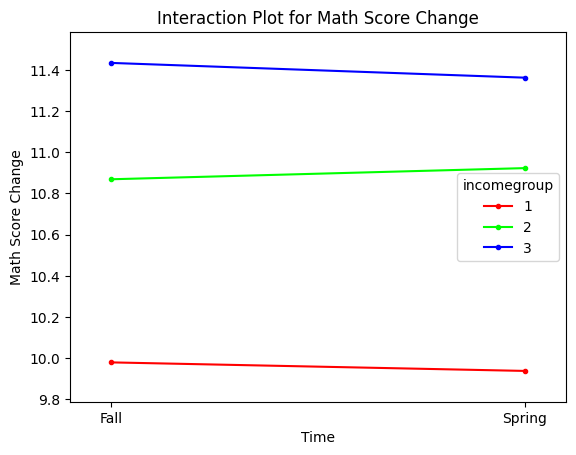

In [20]:
df['time'] = np.random.choice(['Fall', 'Spring'], size=df.shape[0])

fig = interaction_plot(x=df['time'], trace=df['incomegroup'], response=df['math_score_change'])
plt.title('Interaction Plot for Math Score Change')
plt.xlabel('Time')
plt.ylabel('Math Score Change')
plt.show()

# General Knowledge Score Change


In [21]:
%pip install dfply
from dfply import *
# summary statistics for dependent variable yield
df['general_score_change'] = df['springgeneralknowledgescore'] - df['fallgeneralknowledgescore']
df >> group_by(X.incomegroup) >> summarize(n=X['general_score_change'].count(), mean=X['general_score_change'].mean(), std=X['general_score_change'].std())

,incomegroup,n,mean,std
0,1,4729,5.121809,4.075088
1,2,3726,5.255720,4.056299
2,3,3478,5.115866,4.025265


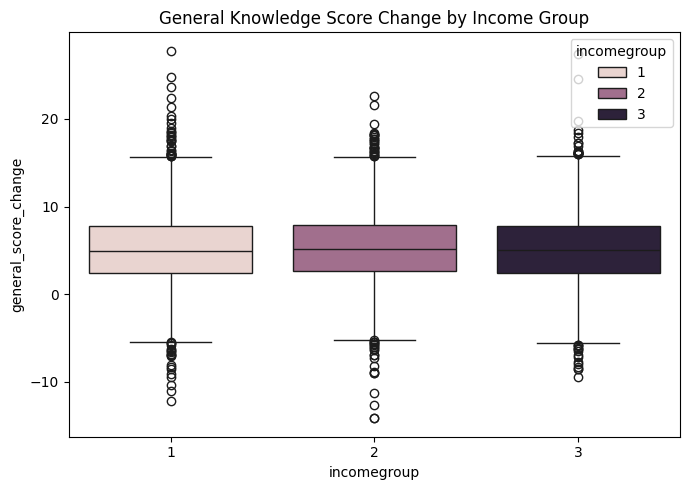

In [22]:
# Boxplot for general knowledge score change by income group
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="incomegroup", y="general_score_change", hue="incomegroup")
plt.title("General Knowledge Score Change by Income Group")
plt.tight_layout()
plt.show()


In [23]:
%pip install pingouin
from pingouin import ancova
ancova(data=df, dv='general_score_change', covar='incomeinthousands', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,74.276726,2,2.259048,0.104495,0.000379
1,incomeinthousands,30.576150,1,1.859883,0.172664,0.000156
2,Residual,196110.715032,11929,NaN,NaN,NaN


In [25]:
# ancova using statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Calculate the change in general knowledge scores
df['general_score_change'] = df['springgeneralknowledgescore'] - df['fallgeneralknowledgescore']
# Perform the ANCOVA
model = ols('general_score_change ~ incomegroup + fallgeneralknowledgescore', data=df).fit()
# Print the summary of the model
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     general_score_change   R-squared:                       0.061
Model:                              OLS   Adj. R-squared:                  0.061
Method:                   Least Squares   F-statistic:                     385.4
Date:                  Sat, 23 Mar 2024   Prob (F-statistic):          6.53e-163
Time:                          18:35:18   Log-Likelihood:                -33263.
No. Observations:                 11933   AIC:                         6.653e+04
Df Residuals:                     11930   BIC:                         6.656e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

In [26]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print("Shapiro-Wilk test:", w, pvalue)

Shapiro-Wilk test: 0.9980871081352234 4.8981738803854924e-11


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [27]:
# Bartlett's test for homogeneity of variances (normally distributed samples)
grouped_data = [df[df['incomegroup'] == group]['general_score_change'] for group in df['incomegroup'].unique()]

w, pvalue = stats.bartlett(*grouped_data)
print("Bartlett's test for homogeneity of variances:", w, pvalue)

Bartlett's test for homogeneity of variances: 0.6071221173084266 0.7381848151843597


In [28]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
w, pvalue = stats.levene(*[df['general_score_change'][df['incomegroup'] == group] for group in df['incomegroup'].unique()])
print("Levene's test for homogeneity of variances:", w, pvalue)

Levene's test for homogeneity of variances: 0.043120083691768084 0.9577965167131874


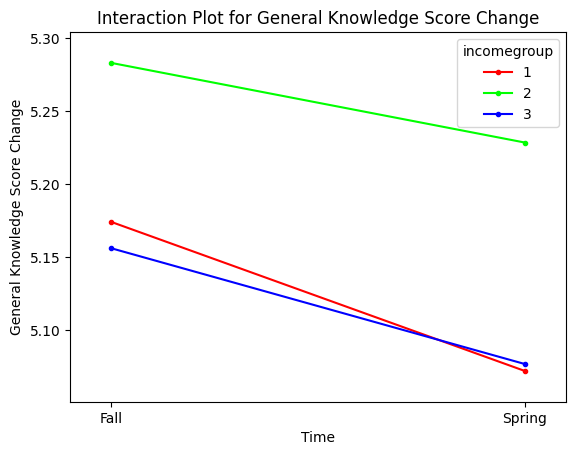

In [29]:
df['time'] = np.random.choice(['Fall', 'Spring'], size=df.shape[0])

fig = interaction_plot(x=df['time'], trace=df['incomegroup'], response=df['general_score_change'])
plt.title('Interaction Plot for General Knowledge Score Change')
plt.xlabel('Time')
plt.ylabel('General Knowledge Score Change')
plt.show()